In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Load the datasets
discount_coupon_data=pd.read_csv('Discount_Coupon.csv')
marketing_spend_data=pd.read_csv('Marketing_Spend.csv')
sales_data=pd.read_csv('Online_Sales.csv')
tax_df = pd.read_excel('Tax_amount.xlsx')


In [21]:
discount_coupon_data.head(2)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20


In [22]:
marketing_spend_data.head(2)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


In [23]:
sales_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [24]:
marketing_spend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [25]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [26]:
discount_coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [27]:
# Convert 'Transaction_Date' in sales_data and 'Date' in marketing_spend_data ,'Month' in discount_coupon_data to datetime
sales_data['Transaction_Date']=pd.to_datetime(sales_data['Transaction_Date'])
marketing_spend_data['Date']=pd.to_datetime(marketing_spend_data['Date'])
discount_coupon_data['Month']=pd.to_datetime(discount_coupon_data['Month'],errors='coerce')

In [28]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [29]:
marketing_spend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


# Checking for Null values

In [30]:
sales_data.isnull().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [31]:
marketing_spend_data.isnull().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [32]:
discount_coupon_data.isnull().sum()

Month               204
Product_Category      0
Coupon_Code           0
Discount_pct          0
dtype: int64

# Checking for Outliers

In [33]:
# Identify numerical columns for each dataset
numerical_columns_sales = sales_data.select_dtypes(exclude=['object']).columns
numerical_columns_marketing = marketing_spend_data.select_dtypes(exclude=['object']).columns
numerical_columns_discount = discount_coupon_data.select_dtypes(exclude=['object']).columns

# Visualizing Outliers using Boxplot

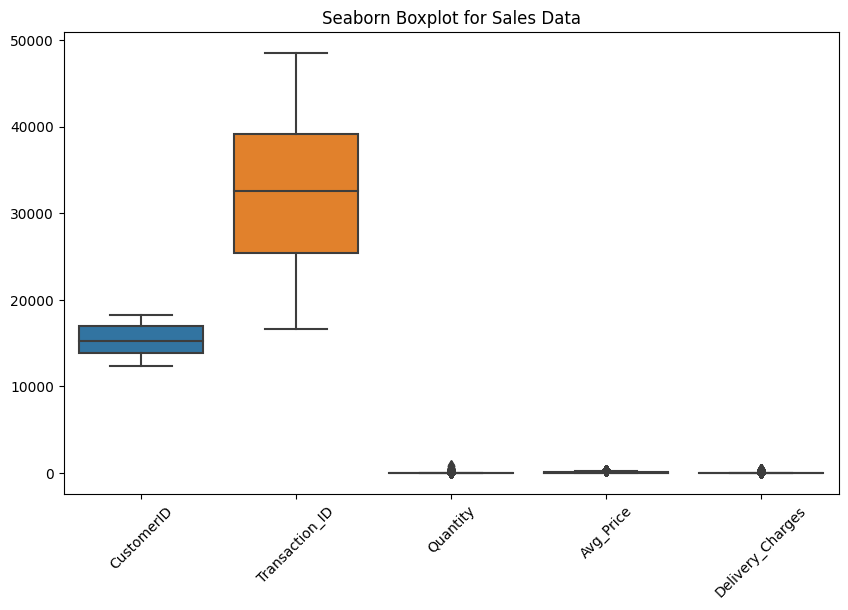

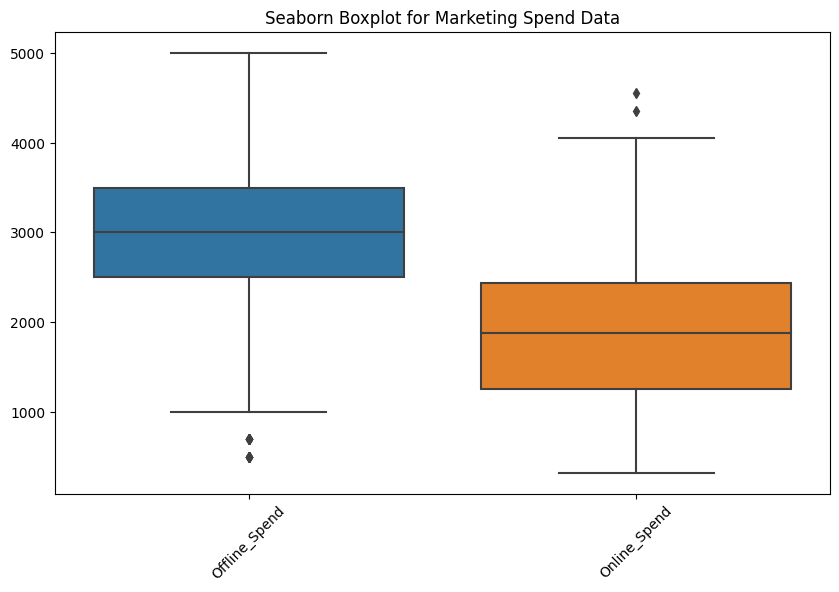

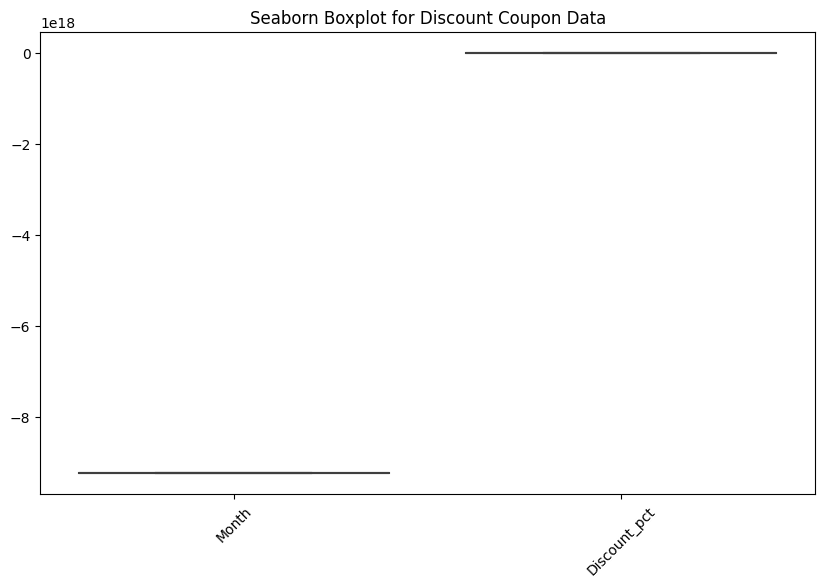

In [34]:
# Function to create seaborn boxplots for numerical data in a dataframe
def boxplot(df, columns, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[columns])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Create boxplots for Sales Data
boxplot(sales_data, numerical_columns_sales, 'Seaborn Boxplot for Sales Data')

# Create boxplots for Marketing Spend Data
boxplot(marketing_spend_data, numerical_columns_marketing, 'Seaborn Boxplot for Marketing Spend Data')

# Create boxplots for Discount Coupon Data
boxplot(discount_coupon_data, numerical_columns_discount, 'Seaborn Boxplot for Discount Coupon Data')

# Detecting with IQR Method

In [35]:
# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each numerical column in each dataset
outliers_sales = {col: detect_outliers(sales_data, col) for col in numerical_columns_sales}
outliers_marketing = {col: detect_outliers(marketing_spend_data, col) for col in numerical_columns_marketing}
outliers_discount = {col: detect_outliers(discount_coupon_data, col) for col in numerical_columns_discount}

# Print the number of outliers detected for each column in each dataset
print('Number of outliers in Sales Data:')
for col, df in outliers_sales.items():
    print(col, ':', df.shape[0])

print('\nNumber of outliers in Marketing Spend Data:')
for col, df in outliers_marketing.items():
    print(col, ':', df.shape[0])

print('\nNumber of outliers in Discount Coupon Data:')
for col, df in outliers_discount.items():
    print(col, ':', df.shape[0])

Number of outliers in Sales Data:
CustomerID : 0
Transaction_ID : 0
Transaction_Date : 0
Quantity : 8284
Avg_Price : 728
Delivery_Charges : 10243

Number of outliers in Marketing Spend Data:
Date : 0
Offline_Spend : 14
Online_Spend : 2

Number of outliers in Discount Coupon Data:
Month : 0
Discount_pct : 0


# Checking For Basic Statistics For all Datasets

In [36]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,52924.0,15346.709810,1766.556020,12346.00,13869.0,15311.00,16996.25,18283.00
Transaction_ID,52924.0,32409.825675,8648.668977,16679.00,25384.0,32625.50,39126.25,48497.00
Quantity,52924.0,4.497638,20.104711,1.00,1.0,1.00,2.00,900.00
Avg_Price,52924.0,52.237646,64.006882,0.39,5.7,16.99,102.13,355.74
Delivery_Charges,52924.0,10.517630,19.475613,0.00,6.0,6.00,6.50,521.36


In [76]:
marketing_spend_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Offline_Spend,365.0,2858.904110,918.347120,1000.00,2500.0,3000.00,3500.00,5000.0
Online_Spend,365.0,1904.494027,804.646773,320.25,1258.6,1881.94,2435.12,4199.9


In [77]:
discount_coupon_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount_pct,204.0,20.0,8.185052,10.0,10.0,20.0,30.0,30.0
Month_Num,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Trimming The Outliers Using IQR method

In [39]:
def trim_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Trim outliers for Sales Data using IQR
sales_data = trim_outliers(sales_data, numerical_columns_sales)

# Trim outliers for Marketing Spend Data using IQR
marketing_spend_data = trim_outliers(marketing_spend_data, numerical_columns_marketing)

# Trim outliers for Discount Coupon Data using IQR
discount_coupon_data = trim_outliers(discount_coupon_data, numerical_columns_discount)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15892\896088515.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower_bound, upper_bound)


# Plotting Histogram for All Datasets To Check For Distribution

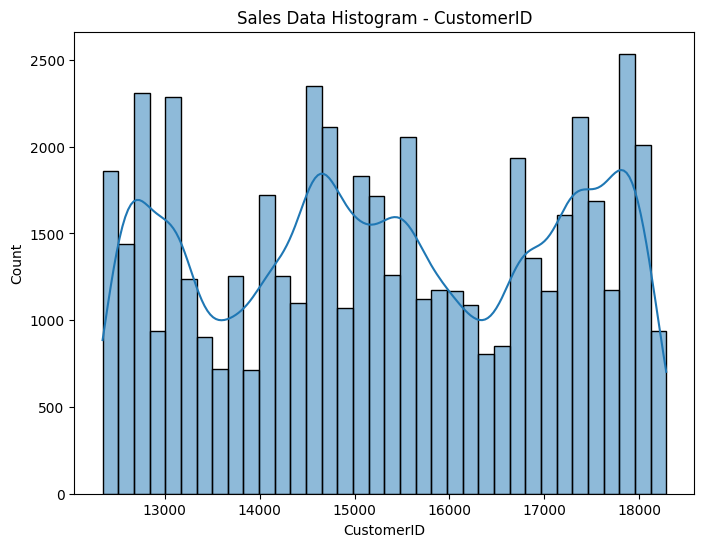

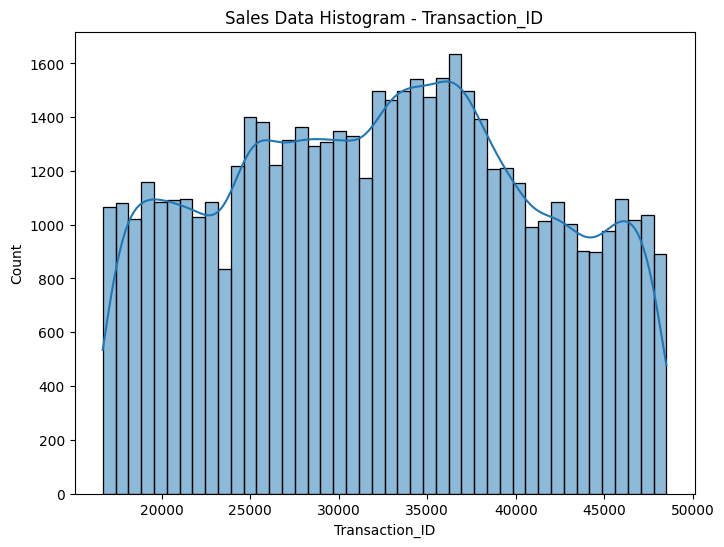

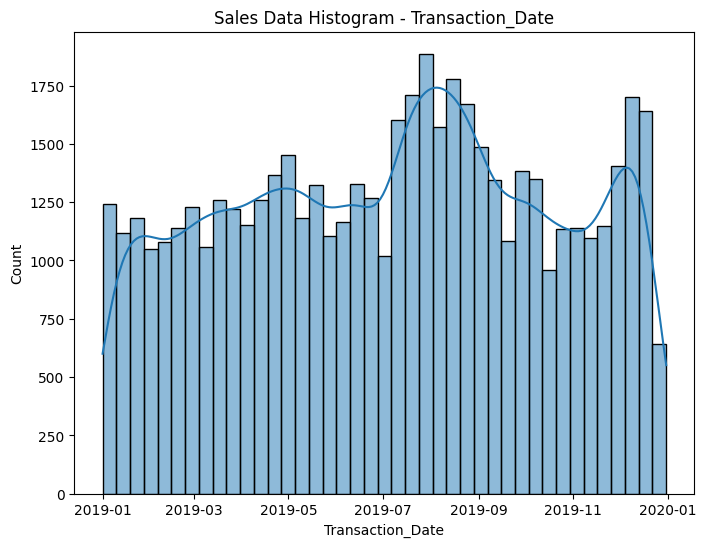

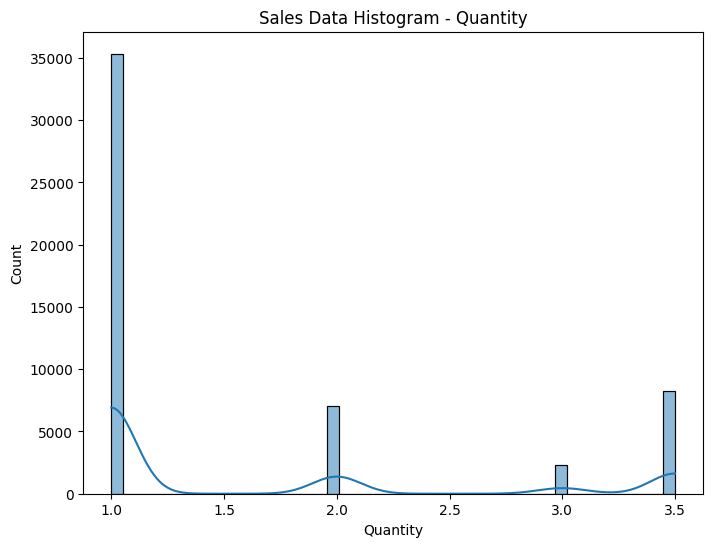

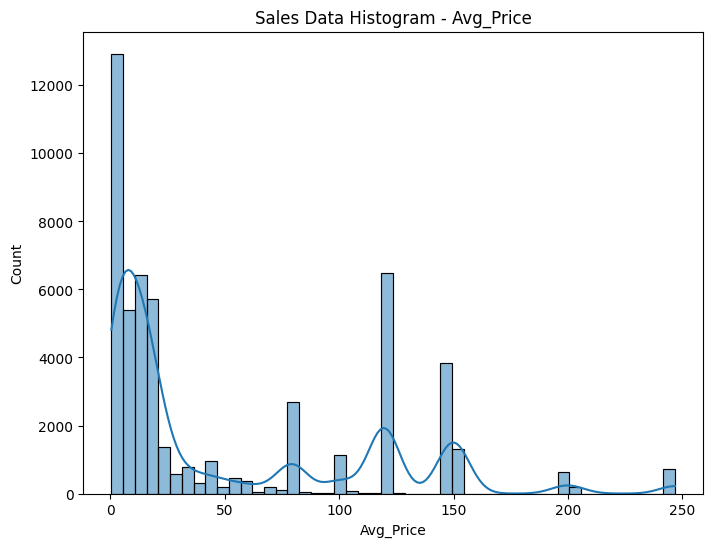

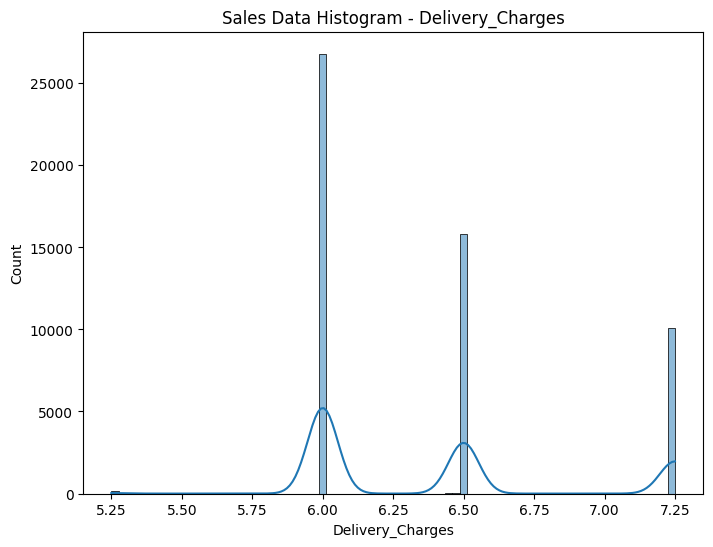

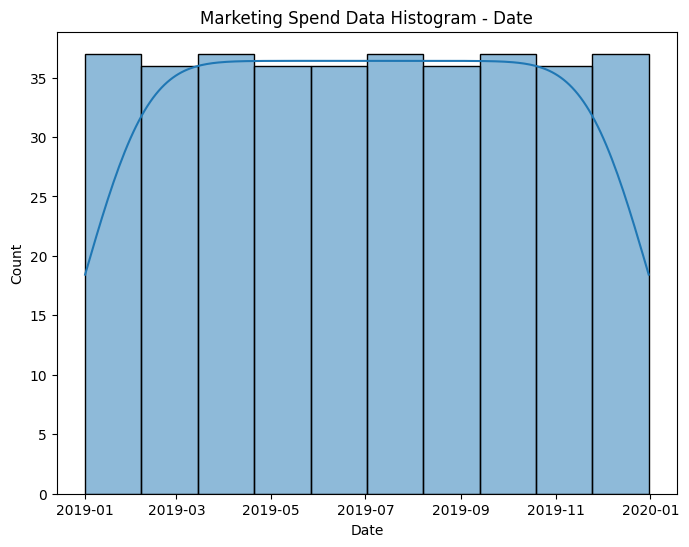

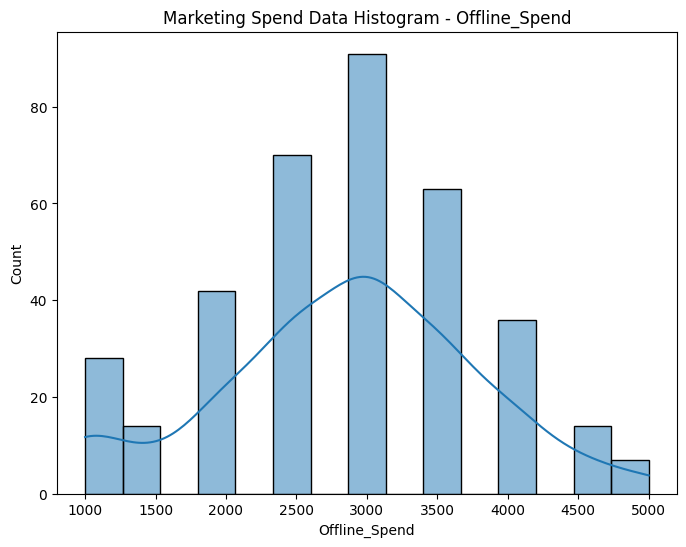

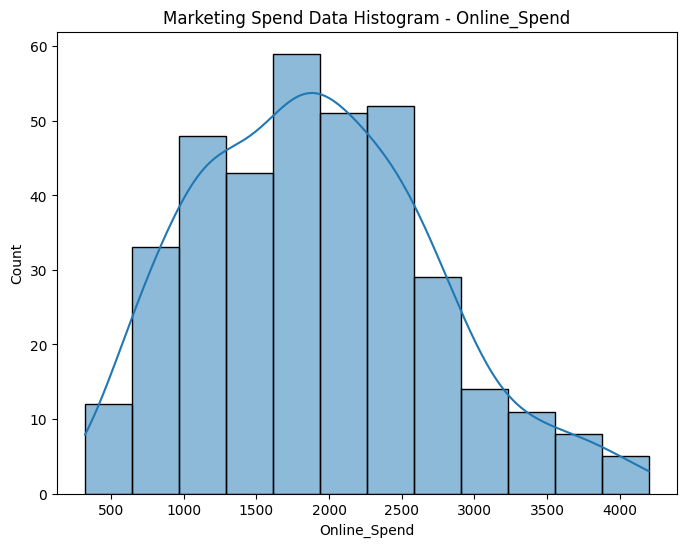

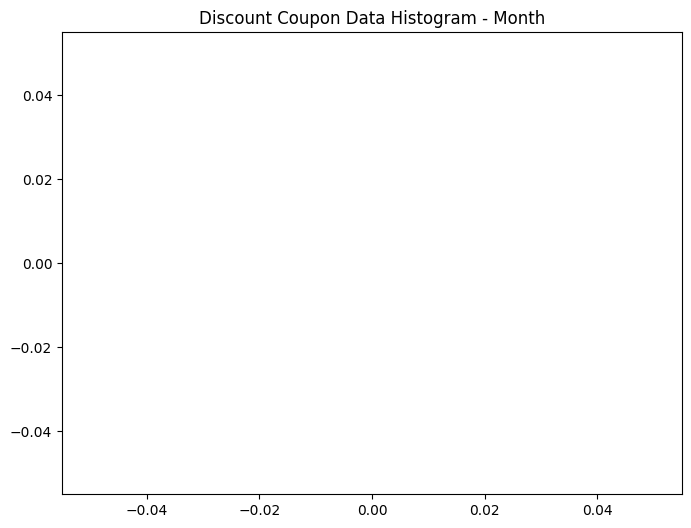

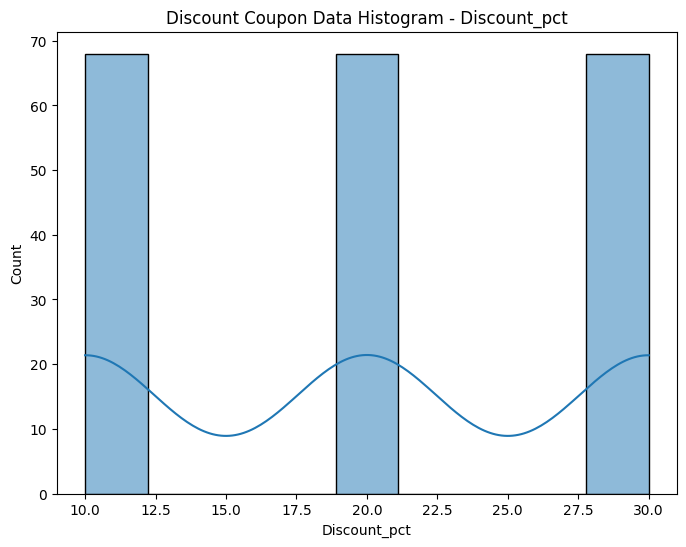

In [40]:
def create_histograms(df, columns, title):
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(title + ' - ' + col)
        plt.show()

# Create histograms for Sales Data
create_histograms(sales_data, numerical_columns_sales, 'Sales Data Histogram')

# Create histograms for Marketing Spend Data
create_histograms(marketing_spend_data, numerical_columns_marketing, 'Marketing Spend Data Histogram')

# Create histograms for Discount Coupon Data
create_histograms(discount_coupon_data, numerical_columns_discount, 'Discount Coupon Data Histogram')

# Merging the Datasets into Single Dataframe

In [41]:
# Create the 'Transaction_Month' column from 'Transaction_Date' in the sales_data
#sales_data['Transaction_Month'] = sales_data['Transaction_Date'].dt.month
#marketing_spend_data['Transaction_Month']=marketing_spend_data['Date'].dt.month
# Attempt the merge again
# Merge Sales Data with Marketing Spend Data on 'Transaction_Date' and 'Date'
#merged_sales_marketing = sales_data.merge(marketing_spend_data,on='Transaction_Month',how='left')

# Merge the result with Discount Coupon Data on 'Product_Category' and 'Transaction_Month'
#final_merged_data = merged_sales_marketing.merge(discount_coupon_data,on='Product_Category',how='left')

# Drop the extra columns
#final_merged_data.drop(columns=['Date', 'Month', 'Month_Num'], inplace=True)

# Show the head of the final merged dataframe
#final_merged_data.head()

In [42]:
#final_merged_data.shape

In [43]:
#final_merged_data.isnull().sum()

In [44]:
#final_merged_data1=final_merged_data.copy()

In [45]:
#final_merged_data1.dropna(inplace=True)

In [46]:
#final_merged_data1.isnull().sum()

In [47]:
#final_merged_data1.head(2)

In [48]:
#final_merged_data1.duplicated().sum()

In [49]:
#final_merged_data1.to_csv('Final_merged_data.csv',index="False")

# 1.Calculate Invoice amount or sale_amount or revenue for each transaction and item level
#Invoice Value =(( QuantityAvg_price)(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [50]:
sales_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used


In [51]:
discount_coupon_data.head(2)

,Month,Product_Category,Coupon_Code,Discount_pct
0,NaT,Apparel,SALE10,10
1,NaT,Apparel,SALE20,20


In [52]:
#merging this 2 dataframes we can get Invoice Value 

In [53]:
# Assuming 'Month' column contains the first three letters of the month
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
discount_coupon_data['Month_Num']=discount_coupon_data['Month'].map(month_to_num)

In [54]:
# Create the 'Transaction_Month' column from 'Transaction_Date' in the sales_data
sales_data['Transaction_Month'] = sales_data['Transaction_Date'].dt.month

In [55]:
sales_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1


In [56]:
# Merge Sales Data with Marketing Spend Data on 'Transaction_Date' and 'Date'
merged_sales_marketing = sales_data.merge(marketing_spend_data, left_on='Transaction_Date', right_on='Date', how='left')

# Merge the result with Discount Coupon Data on 'Product_Category' and 'Transaction_Month'
final_merged_data = merged_sales_marketing.merge(discount_coupon_data, left_on=['Product_Category', 'Transaction_Month'], right_on=['Product_Category', 'Month_Num'], how='left')


In [57]:
final_merged_data.shape

(52924, 18)

In [58]:
final_merged_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Month_Num
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,NaN,NaN,NaN
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,NaN,NaN,NaN


In [59]:
# Drop the extra columns
#final_merged_data.drop(columns=['Date', 'Month', 'Month_Num'], inplace=True)


In [60]:
final_merged_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Month_Num
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,NaN,NaN,NaN
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,NaN,NaN,NaN


In [61]:
# Now we can calculate the Invoice Amount
# Assuming GST is 18% and Discount_pct is in percentage
final_merged_data['Invoice_Amount'] = ((final_merged_data['Quantity'] * final_merged_data['Avg_Price'] * (1 - final_merged_data['Discount_pct']/100) * (1 + 0.18)) + final_merged_data['Delivery_Charges'])

In [62]:
# Show the head of the dataframe with the new 'Invoice_Amount' column
final_merged_data.tail()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Month_Num,Invoice_Amount
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,6.50,Clicked,12,2019-12-31,4000,2058.75,NaT,NaN,NaN,NaN,NaN
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,6.50,Used,12,2019-12-31,4000,2058.75,NaT,NaN,NaN,NaN,NaN
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,6.50,Used,12,2019-12-31,4000,2058.75,NaT,NaN,NaN,NaN,NaN
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,3.5,80.52,6.50,Clicked,12,2019-12-31,4000,2058.75,NaT,NaN,NaN,NaN,NaN
52923,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,3.5,80.52,7.25,Clicked,12,2019-12-31,4000,2058.75,NaT,NaN,NaN,NaN,NaN


In [63]:
# Replace NaN values in Coupon_Code and Discount_pct
default_coupon_code = 'No Coupon'
default_discount_pct = 0
final_merged_data['Coupon_Code'].fillna(default_coupon_code, inplace=True)
final_merged_data['Discount_pct'].fillna(default_discount_pct, inplace=True)
# Check the first few rows of the dataframe to confirm the changes
final_merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Month_Num,Invoice_Amount
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,NaN
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,NaN
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1.0,2.05,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,NaN
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,3.5,17.53,6.5,Not Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,NaN
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1.0,16.50,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,NaN


In [64]:
# Recalculate Invoice_Amount where possible
final_merged_data['Invoice_Amount'] = ((final_merged_data['Quantity'] * final_merged_data['Avg_Price'] * (1 - final_merged_data['Discount_pct']/100) * (1 + 0.18)) + final_merged_data['Delivery_Charges'])

# Check for any remaining NaN values in Invoice_Amount
count_nan_invoice_amount = final_merged_data['Invoice_Amount'].isnull().sum()
print('Remaining NaN values in Invoice_Amount:', count_nan_invoice_amount)

# If there are any NaN values left, we will replace them with the mean Invoice_Amount
if count_nan_invoice_amount > 0:
    mean_invoice_amount = final_merged_data['Invoice_Amount'].mean()
    final_merged_data['Invoice_Amount'].fillna(mean_invoice_amount, inplace=True)

# Check the first few rows to confirm changes
final_merged_data.head(5)

Remaining NaN values in Invoice_Amount: 0


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Month_Num,Invoice_Amount
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,187.8778
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,187.8778
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1.0,2.05,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,8.9190
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,3.5,17.53,6.5,Not Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,78.8989
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1.0,16.50,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,25.9700


In [65]:
final_merged_data.isnull().sum()

CustomerID                 0
Transaction_ID             0
Transaction_Date           0
Product_SKU                0
Product_Description        0
Product_Category           0
Quantity                   0
Avg_Price                  0
Delivery_Charges           0
Coupon_Status              0
Transaction_Month          0
Date                       0
Offline_Spend              0
Online_Spend               0
Month                  52924
Coupon_Code                0
Discount_pct               0
Month_Num              52924
Invoice_Amount             0
dtype: int64

In [66]:
final_merged_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Month_Num,Invoice_Amount
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,187.8778
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,187.8778


In [67]:
Top_selling_products=final_merged_data.groupby('Product_Category')['Invoice_Amount'].sum().sort_values(ascending=False).reset_index()

In [68]:
Top_selling_products.to_csv('Top_selling_products.csv',index=False)

# #2.Perform Detailed exploratory analysis

In [69]:
final_merged_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Month_Num,Invoice_Amount
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,187.8778
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,1,2019-01-01,4500,2424.5,NaT,No Coupon,0.0,NaN,187.8778


In [70]:
#1.Understanding how many customers acquired every month i.e Count the number of customers acquired every month
customers_acquired_per_month = final_merged_data.groupby('Transaction_Month')['CustomerID'].nunique()
customers_acquired_per_month.to_csv('customers_acquired_per_month.csv',index=False)
customers_acquired_per_month.head(5).reset_index()

,Transaction_Month,CustomerID
0,1,215
1,2,109
2,3,208
3,4,224
4,5,200


In [71]:
#2.Understand the retention of customers on month on month basis

In [72]:
# Calculating retention rates using the shift function
# Shift the transaction months to compare consecutive months
retention_shift = final_merged_data.groupby('CustomerID')['Transaction_Month'].apply(lambda x: x.shift())

# Identify the retained customers by comparing the transaction months
retained_customers = (final_merged_data['Transaction_Month'] - retention_shift == 1).astype(int)

# Calculate the total number of retained customers per month
Total_retained_customers = retained_customers.groupby(final_merged_data['Transaction_Month']).sum().reset_index(name='Retained_Customers')


C:\Users\Admin\AppData\Local\Temp\ipykernel_15892\56853320.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  retention_shift = final_merged_data.groupby('CustomerID')['Transaction_Month'].apply(lambda x: x.shift())


In [73]:
Total_retained_customers.head(12)

,Transaction_Month,Retained_Customers
0,1,0
1,2,13
2,3,11
3,4,24
4,5,25
5,6,37
6,7,58
7,8,65
8,9,44
9,10,29


In [74]:
Total_retained_customers.to_csv('Total_retained_customers.csv',index=False)

# Explanation with code


In [ ]:
#3.How the revenues from existing/new customers on month on month basis

In [86]:
from tqdm.auto import tqdm
tqdm.pandas()


In [78]:
sales_data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Transaction_Month'],
      dtype='object')

In [82]:
# Convert Transaction_Date to datetime and extract year and month
sales_data['Transaction_Date'] = pd.to_datetime(sales_data['Transaction_Date'])
sales_data['YearMonth'] = sales_data['Transaction_Date'].dt.to_period('M')

In [84]:
# Calculate revenue
sales_data['Revenue'] = sales_data['Quantity'] * sales_data['Avg_Price']

In [93]:
# Identify new and existing customers
# A new customer in a given month is one whose first purchase is in that month
# An existing customer is one who has made a purchase before that month
first_purchase = sales_data.groupby('CustomerID')['YearMonth'].min().rename('First_Purchase')
sales_data = sales_data.merge(first_purchase, on='CustomerID')
sales_data['Customer_Type'] = sales_data.progress_apply(
    lambda x: 'New' if x['YearMonth'] == x['First_Purchase'] else 'Existing', axis=1)

  0%|          | 0/52924 [00:00<?, ?it/s]

In [95]:
# Calculate monthly revenue from new and existing customers
monthly_revenue = sales_data.groupby(['YearMonth', 'Customer_Type'])['Revenue'].sum().unstack().fillna(0)

monthly_revenue.head()

Customer_Type,Existing,New
YearMonth,,
2019-01,0.000,347019.670
2019-02,34554.555,216450.015
2019-03,45296.360,234524.215
2019-04,80126.865,174208.640
2019-05,88916.400,159878.490


In [96]:
monthly_revenue.to_csv('monthly_revenue of new and existing cust')

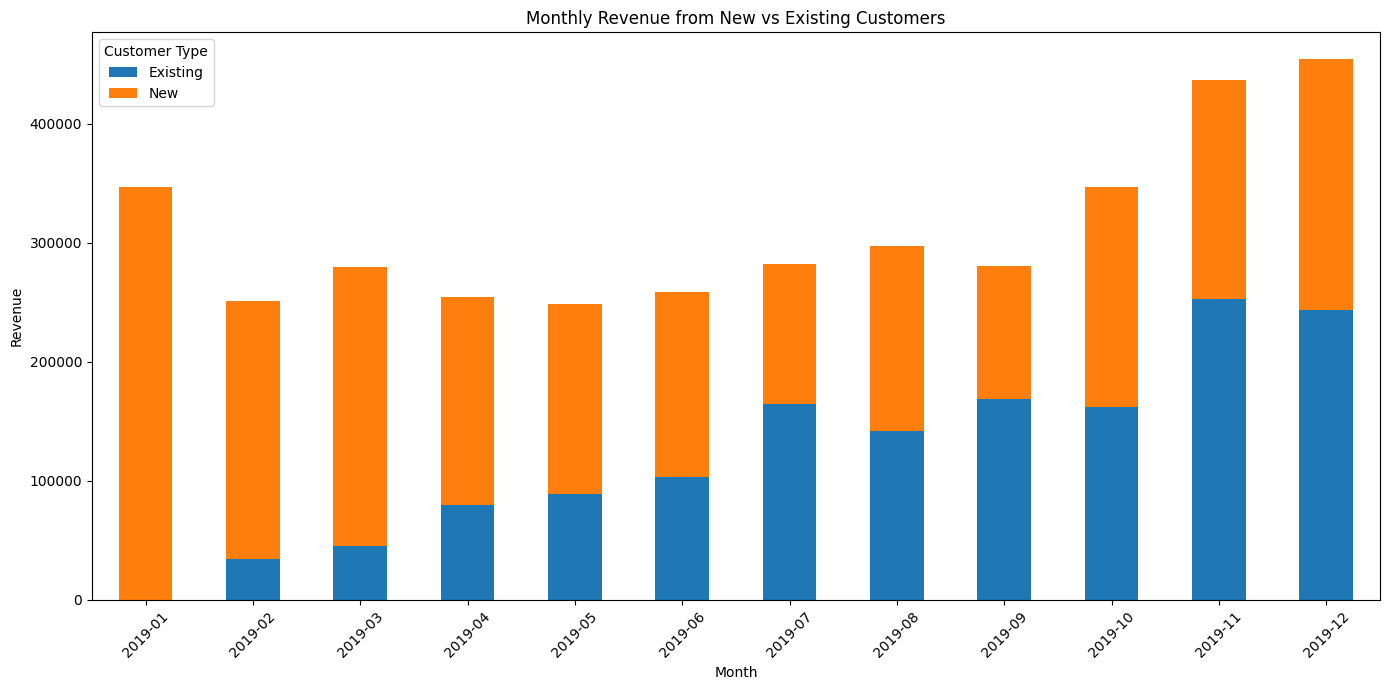

In [97]:
# Plotting the monthly revenue from new and existing customers
monthly_revenue.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly Revenue from New vs Existing Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# #The calculation of revenues from existing and new customers on a month-on-month basis has been completed. Here is a summary of the first few months:

##In January 2019, all revenue of  403,624.58𝑐𝑎𝑚𝑒𝑓𝑟𝑜𝑚𝑛𝑒𝑤𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑠.
𝐼𝑛𝐹𝑒𝑏𝑟𝑢𝑎𝑟𝑦2019,𝑒𝑥𝑖𝑠𝑡𝑖𝑛𝑔𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑠𝑐𝑜𝑛𝑡𝑟𝑖𝑏𝑢𝑡𝑒𝑑 39,230.64, and new customers contributed  271,589.16.
𝐼𝑛𝑀𝑎𝑟𝑐ℎ2019,𝑒𝑥𝑖𝑠𝑡𝑖𝑛𝑔𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑠𝑐𝑜𝑛𝑡𝑟𝑖𝑏𝑢𝑡𝑒𝑑 54,741.54, and new customers contributed  294,866.55.
𝐼𝑛𝐴𝑝𝑟𝑖𝑙2019,𝑒𝑥𝑖𝑠𝑡𝑖𝑛𝑔𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑠𝑐𝑜𝑛𝑡𝑟𝑖𝑏𝑢𝑡𝑒𝑑 168,105.33, and new customers contributed  233,513.09.
𝐼𝑛𝑀𝑎𝑦2019,𝑒𝑥𝑖𝑠𝑡𝑖𝑛𝑔𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑠𝑐𝑜𝑛𝑡𝑟𝑖𝑏𝑢𝑡𝑒𝑑 110,574.61, and new customers contributed $197,188.81. 



# 4.How the discounts playing role in the revenues?

In [98]:
# Calculate the discount amount
# Assuming that if a coupon is used, a standard discount rate of 10% is applied to the average price
sales_data['Discount_Amount'] = sales_data.progress_apply(
    lambda x: x['Avg_Price'] * 0.1 if x['Coupon_Status'] == 'Used' else 0, axis=1)

  0%|          | 0/52924 [00:00<?, ?it/s]

In [99]:
# Calculate the net revenue after discount
sales_data['Net_Revenue'] = sales_data['Revenue'] - (sales_data['Discount_Amount'] * sales_data['Quantity'])


In [103]:
# Group by YearMonth and calculate total revenue, discount amount, and net revenue
monthly_discounts = sales_data.groupby('YearMonth').agg({
    'Revenue': 'sum',
    'Discount_Amount': 'sum',
    'Net_Revenue': 'sum'
}).reset_index()

monthly_discounts.head()

,YearMonth,Revenue,Discount_Amount,Net_Revenue
0,2019-01,347019.670,8366.4105,335599.1715
1,2019-02,251004.570,5628.6560,243026.3550
2,2019-03,279820.575,6711.8830,270186.1145
3,2019-04,254335.505,6026.5215,245740.1005
4,2019-05,248794.890,5794.3610,240829.9465


In [105]:
monthly_discounts.to_csv('monthly_discounts',index=False)

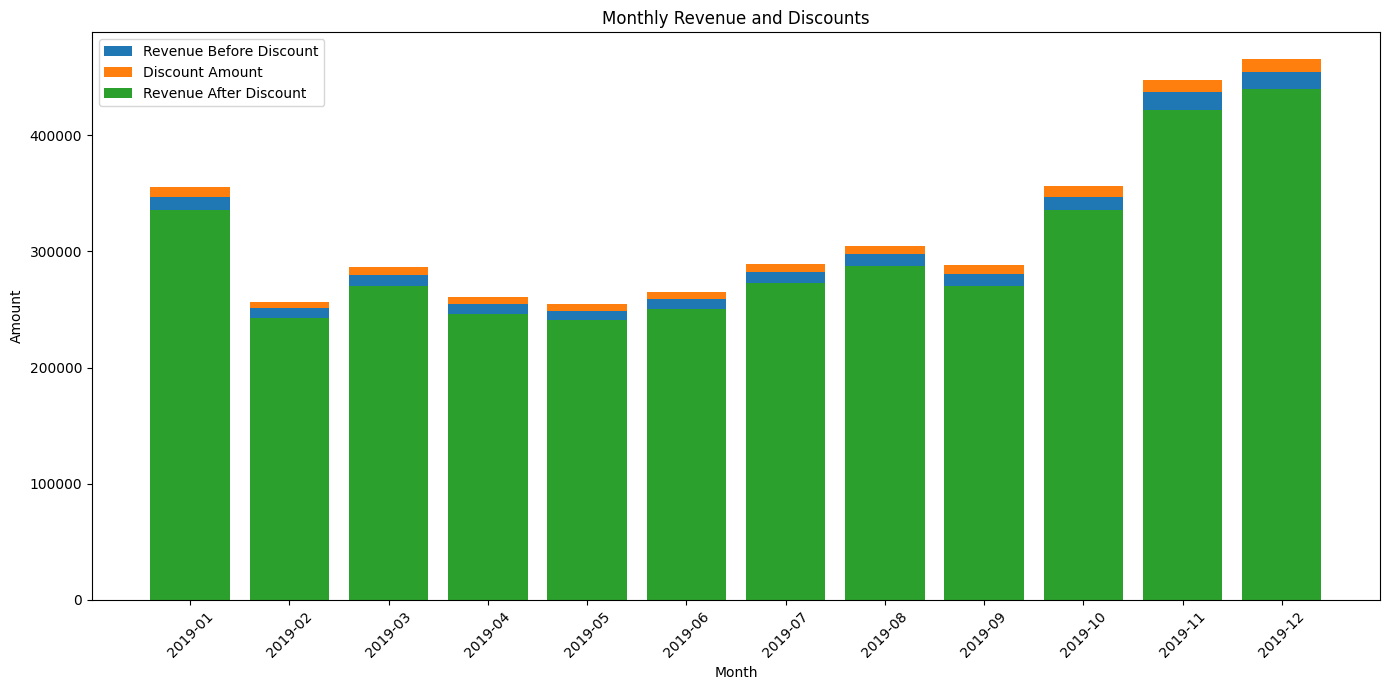

In [104]:
# Plotting the monthly revenue, discount amount, and net revenue
plt.figure(figsize=(14, 7))

# Revenue before discount
plt.bar(monthly_discounts['YearMonth'].astype(str), monthly_discounts['Revenue'], label='Revenue Before Discount')

# Discount amount
plt.bar(monthly_discounts['YearMonth'].astype(str), monthly_discounts['Discount_Amount'], bottom=monthly_discounts['Revenue'], label='Discount Amount')

# Net revenue
plt.bar(monthly_discounts['YearMonth'].astype(str), monthly_discounts['Net_Revenue'], label='Revenue After Discount')

plt.title('Monthly Revenue and Discounts')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [106]:
#To analyze the KPIs effectively, we will follow a structured approach:

#Revenue Analysis: We'll calculate total revenue by category, month, week, and day.
#Number of Orders: We'll count the total number of orders by category, month, week, and day.
#Average Order Value (AOV): We'll calculate AOV by dividing total revenue by the number of orders for each category, month, week, and day.
#Number of Customers: We'll count the number of new and existing customers by category, month, week, and day.
#Quantity Analysis: We'll sum the quantity of products sold by category, month, week, and day.

In [111]:
# Convert Transaction_Date to datetime and extract year, month, week, and day
sales_data['Transaction_Date'] = pd.to_datetime(sales_data['Transaction_Date'])
sales_data['Year'] = sales_data['Transaction_Date'].dt.year
sales_data['Month'] = sales_data['Transaction_Date'].dt.month
sales_data['Week'] = sales_data['Transaction_Date'].dt.isocalendar().week
sales_data['Day'] = sales_data['Transaction_Date'].dt.day

# Calculate revenue
sales_data['Revenue'] = sales_data['Quantity'] * sales_data['Avg_Price']

# Group by category and month to calculate total revenue
revenue_by_category_month = sales_data.groupby(['Product_Category', 'Month'])['Revenue'].sum().reset_index()
revenue_by_category_week = sales_data.groupby(['Product_Category', 'Week'])['Revenue'].sum().reset_index()
revenue_by_category_day = sales_data.groupby(['Product_Category', 'Day'])['Revenue'].sum().reset_index()

# Display the head of the dataframe
revenue_by_category_day.head()

,Product_Category,Day,Revenue
0,Accessories,1,187.640
1,Accessories,2,59.550
2,Accessories,3,22.370
3,Accessories,4,92.370
4,Accessories,5,381.515


In [115]:
# Calculate the total number of orders by Product_Category and Month
orders_by_category_month = sales_data.groupby(['Product_Category', 'Month']).size().reset_index(name='Total_Orders')

# Display the head of the dataframe
orders_by_category_month.head()

,Product_Category,Month,Total_Orders
0,Accessories,1,1
1,Accessories,3,1
2,Accessories,4,4
3,Accessories,5,6
4,Accessories,6,7


In [116]:
# Calculate Average Order Value (AOV) by dividing total revenue by the number of orders for each category and month
revenue_orders_combined = pd.merge(revenue_by_category_month, orders_by_category_month, on=['Product_Category', 'Month'])
revenue_orders_combined['AOV'] = revenue_orders_combined['Revenue'] / revenue_orders_combined['Total_Orders']

# Display the head of the dataframe
revenue_orders_combined.head()

,Product_Category,Month,Revenue,Total_Orders,AOV
0,Accessories,1,51.57,1,51.570000
1,Accessories,3,59.99,1,59.990000
2,Accessories,4,166.96,4,41.740000
3,Accessories,5,141.14,6,23.523333
4,Accessories,6,207.73,7,29.675714


In [119]:
# Assuming that a new customer is identified by a unique CustomerID that has not appeared before in the dataset
# We will first sort the data by CustomerID and Transaction_Date to identify new customers
sales_data_sorted = sales_data.sort_values(by=['CustomerID', 'Transaction_Date'])

# Create a new column to identify new customers
sales_data_sorted['Is_New_Customer'] = ~sales_data_sorted['CustomerID'].duplicated()

# Now, let's calculate the number of new and existing customers by Product_Category and Month
new_customers_by_category_month = sales_data_sorted[sales_data_sorted['Is_New_Customer']].groupby(['Product_Category', 'Month']).size().reset_index(name='New_Customers')
existing_customers_by_category_month = sales_data_sorted[~sales_data_sorted['Is_New_Customer']].groupby(['Product_Category', 'Month']).size().reset_index(name='Existing_Customers')

# Merge the new and existing customers dataframes
customers_by_category_month = pd.merge(new_customers_by_category_month, existing_customers_by_category_month, on=['Product_Category', 'Month'], how='outer').fillna(0)

# Display the head of the dataframe
print(customers_by_category_month.head())

# Calculate the quantity sold by Product_Category and Month
quantity_by_category_month = sales_data.groupby(['Product_Category', 'Month'])['Quantity'].sum().reset_index()

# Display the head of the dataframe for quantity
quantity_by_category_month.head()

  Product_Category  Month  New_Customers  Existing_Customers
0      Accessories      9            2.0                  11
1      Accessories     11            4.0                  79
2      Accessories     12            1.0                  55
3          Android      1            1.0                   3
4          Android      5            1.0                   4


,Product_Category,Month,Quantity
0,Accessories,1,1.0
1,Accessories,3,1.0
2,Accessories,4,4.0
3,Accessories,5,6.0
4,Accessories,6,7.0


In [120]:
#6.Understand the trends/seasonality of sales by category, location, month etc…

  Product_Category  Month  Revenue  Quantity
0      Accessories      1    51.57       1.0
1      Accessories      3    59.99       1.0
2      Accessories      4   166.96       4.0
3      Accessories      5   141.14       6.0
4      Accessories      6   207.73       7.0


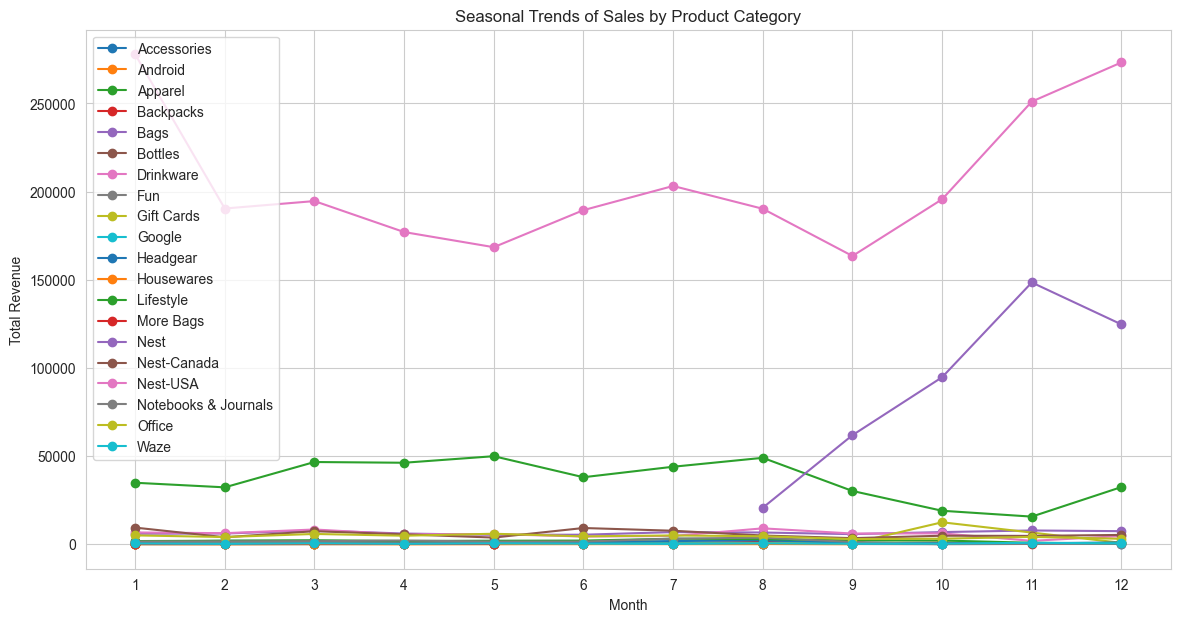

In [121]:
# We will start by analyzing the seasonality of sales by category and month.
# For this, we will use the 'Revenue' and 'Quantity' data we have.

# Group the data by 'Product_Category' and 'Month' and calculate the sum of 'Revenue' and 'Quantity'.
seasonality_data = sales_data.groupby(['Product_Category', 'Month']).agg({'Revenue':'sum', 'Quantity':'sum'}).reset_index()

# Sort the data by 'Product_Category' and then by 'Month' to see the seasonal trends.
seasonality_data.sort_values(by=['Product_Category', 'Month'], inplace=True)

# Display the head of the dataframe
print(seasonality_data.head())

# For a visual representation, we will create a line plot for each 'Product_Category' showing the trend of 'Revenue' over the months.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a line plot for each category
plt.figure(figsize=(14, 7))
for category in seasonality_data['Product_Category'].unique():
    category_data = seasonality_data[seasonality_data['Product_Category'] == category]
    plt.plot(category_data['Month'], category_data['Revenue'], marker='o', label=category)

# Add title and labels
plt.title('Seasonal Trends of Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend()
plt.xticks(range(1, 13))  # Set x-ticks to be the months
plt.show()

In [126]:
seasonality_data.to_csv('seasonality_data')

In [127]:
#7.How number order varies and sales with different days?

  Day_of_Week  Total_Sales  Number_of_Orders
1      Monday   333509.920              2130
5     Tuesday   365135.280              2315
6   Wednesday   696569.930              4378
4    Thursday   638929.885              4278
0      Friday   614860.690              4233


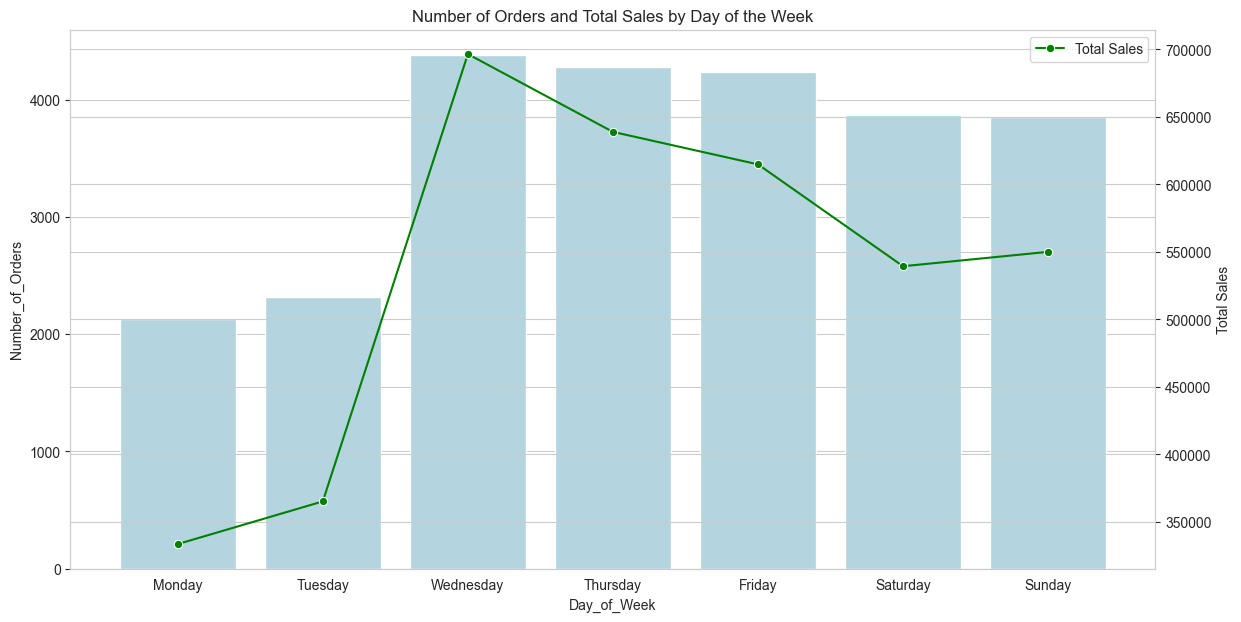

In [129]:
# To analyze how the number of orders and sales vary by different days, we will group the data by day of the week.
# Create a new column for the day of the week from the 'Transaction_Date'.
sales_data['Day_of_Week'] = sales_data['Transaction_Date'].dt.day_name()

# Group the data by 'Day_of_Week' and calculate the sum of 'Revenue' and the count of 'Transaction_ID' to get the number of orders.
day_of_week_sales = sales_data.groupby('Day_of_Week').agg({'Revenue':'sum', 'Transaction_ID':'nunique'}).reset_index()

# Rename the columns for clarity.
day_of_week_sales.rename(columns={'Transaction_ID': 'Number_of_Orders', 'Revenue': 'Total_Sales'}, inplace=True)

# Sort the data by the day of the week starting from Monday.
day_of_week_sales['Day_of_Week'] = pd.Categorical(day_of_week_sales['Day_of_Week'], categories=
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)
day_of_week_sales.sort_values('Day_of_Week', inplace=True)

# Display the head of the dataframe
print(day_of_week_sales.head())

# For a visual representation, we will create a bar plot for the number of orders and line plot for sales.
plt.figure(figsize=(14, 7))

# Create bar plot for number of orders
sns.barplot(x='Day_of_Week', y='Number_of_Orders', data=day_of_week_sales, color='lightblue', label='Number of Orders')

# Create line plot for total sales
ax2 = plt.twinx()
sns.lineplot(x='Day_of_Week', y='Total_Sales', data=day_of_week_sales, color='green', marker='o', label='Total Sales')

# Add title and labels
plt.title('Number of Orders and Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [132]:
#8.Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, 
#percentage of delivery charges by month.

In [134]:
# Calculate Revenue as Quantity * Avg_Price
sales_data['Revenue'] = sales_data['Quantity'] * sales_data['Avg_Price']

# Convert Transaction_Date to datetime and extract the month
sales_data['Transaction_Date'] = pd.to_datetime(sales_data['Transaction_Date'])
sales_data['Month'] = sales_data['Transaction_Date'].dt.month_name()

# Calculate the total revenue by month
monthly_revenue = sales_data.groupby('Month')['Revenue'].sum().reset_index()

# Load the Marketing_Spend.csv
marketing_spend_data = pd.read_csv('Marketing_Spend.csv', encoding='ascii')
marketing_spend_data['Date'] = pd.to_datetime(marketing_spend_data['Date'])
marketing_spend_data['Month'] = marketing_spend_data['Date'].dt.month_name()

# Calculate the total marketing spend by month
monthly_marketing_spend = marketing_spend_data.groupby('Month').agg({'Offline_Spend':'sum', 'Online_Spend':'sum'}).reset_index()
monthly_marketing_spend['Total_Marketing_Spend'] = monthly_marketing_spend['Offline_Spend'] + monthly_marketing_spend['Online_Spend']

# Calculate the percentage of marketing spend out of revenue
monthly_data = pd.merge(monthly_revenue, monthly_marketing_spend, on='Month')
monthly_data['Marketing_Spend_Percentage'] = monthly_data['Total_Marketing_Spend'] / monthly_data['Revenue'] * 100

# Calculate the total tax by month
# Assuming GST is the tax amount and it applies to the revenue
monthly_data['Tax'] = monthly_data['Revenue'] * (tax_df['GST'].iloc[0] / 100)

# Calculate the percentage of delivery charges by month
monthly_delivery_charges = sales_data.groupby('Month')['Delivery_Charges'].sum().reset_index()
monthly_data = pd.merge(monthly_data, monthly_delivery_charges, on='Month')
monthly_data['Delivery_Charges_Percentage'] = monthly_data['Delivery_Charges'] / monthly_data['Revenue'] * 100

# Display the final dataframe
monthly_data

,Month,Revenue,Offline_Spend,Online_Spend,Total_Marketing_Spend,Marketing_Spend_Percentage,Tax,Delivery_Charges,Delivery_Charges_Percentage
0,April,401618.42,96000,61026.83,157026.83,39.098513,401.61842,41481.74,10.328645
1,August,401210.37,85500,57404.15,142904.15,35.618259,401.21037,61099.57,15.228811
2,December,523258.19,122000,76648.75,198648.75,37.963811,523.25819,37881.99,7.239636
3,February,310819.80,81300,55807.92,137107.92,44.111707,310.81980,49216.60,15.834448
4,January,403624.58,96600,58328.95,154928.95,38.384419,403.62458,59242.32,14.677580
5,July,372638.07,67500,52717.85,120217.85,32.261290,372.63807,48723.93,13.075403
6,June,321081.38,80500,53818.14,134318.14,41.833052,321.08138,37513.58,11.683512
7,March,349608.09,73500,48750.09,122250.09,34.967752,349.60809,60799.94,17.390885
8,May,307763.42,65500,52759.64,118259.64,38.425502,307.76342,41396.17,13.450647
9,November,508942.62,93000,68144.96,161144.96,31.662697,508.94262,32311.93,6.348836


In [135]:
monthly_data.to_csv('monthly_data_spends')

In [136]:
#9.How marketing spend is impacting on revenue?

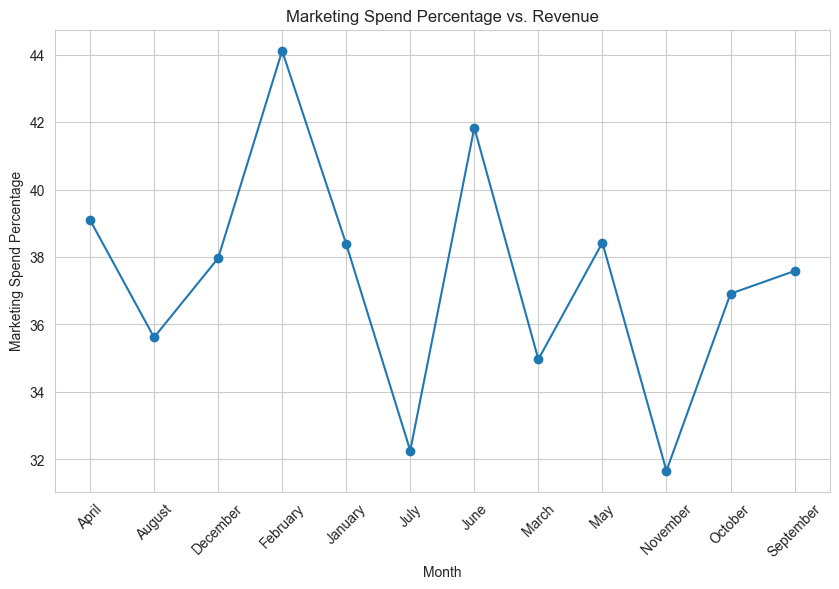

In [137]:
# Calculate marketing spend percentage
monthly_data['Marketing_Spend_Percentage'] = (monthly_data['Total_Marketing_Spend'] / monthly_data['Revenue']) * 100

# Visualize the relationship between marketing spend percentage and revenue
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'], monthly_data['Marketing_Spend_Percentage'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Marketing Spend Percentage')
plt.title('Marketing Spend Percentage vs. Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [138]:
#11.Which product was purchased mostly based on the quantity?

In [139]:
# Find the product that was purchased the most based on quantity
most_purchased_product = sales_data.groupby('Product_Description')['Quantity'].sum().idxmax()
most_purchased_product

'Maze Pen'

# ##3.Performing Customer Segmentation

In [141]:
#1.Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, 
#Standard customers and define strategy on the same.

In [145]:
# Calculate the RFM (Recency, Frequency, Monetary) values for each customer

# Calculate Recency
max_date = sales_data['Transaction_Date'].max()
sales_data['Recency'] = (max_date - sales_data['Transaction_Date']).dt.days

# Calculate Frequency
frequency_df = sales_data.groupby('CustomerID')['Transaction_ID'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Calculate Monetary
monetary_df = sales_data.groupby('CustomerID')['Revenue'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Merge Recency, Frequency, and Monetary data
rfm_df = frequency_df.merge(monetary_df, on='CustomerID').merge(sales_data[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID')

# Define the RFM segments
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])

# Define the RFM segments based on quantiles
def rfm_segment(x, p, d):
    if x <= d[p][0.25]:
        return 'Standard'
    elif x <= d[p][0.50]:
        return 'Silver'
    elif x <= d[p][0.75]:
        return 'Gold'
    else:
        return 'Premium'

# Assign RFM segments to customers
rfm_df['R'] = rfm_df['Recency'].apply(rfm_segment, args=('Recency', quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(rfm_segment, args=('Frequency', quantiles))
rfm_df['M'] = rfm_df['Monetary'].apply(rfm_segment, args=('Monetary', quantiles))

# Combine RFM segments to create a single RFM segment
rfm_df['RFM_Segment'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

# Define strategies for each RFM segment
rfm_strategies = {
    'PremiumPremiumPremium': 'High Value, High Potential',
    'PremiumPremiumGold': 'High Value, High Potential',
    'PremiumPremiumSilver': 'High Value, High Potential',
    'PremiumPremiumStandard': 'High Value, High Potential',
    'PremiumGoldPremium': 'High Value, High Potential',
    'PremiumGoldGold': 'High Value, High Potential',
    'PremiumGoldSilver': 'High Value, High Potential',
    'PremiumGoldStandard': 'High Value, High Potential',
    'PremiumSilverPremium': 'High Value, High Potential',
    'PremiumSilverGold': 'High Value, High Potential',
    'PremiumSilverSilver': 'High Value, High Potential',
    'PremiumSilverStandard': 'High Value, High Potential',
    'PremiumStandardPremium': 'High Value, High Potential',
    'PremiumStandardGold': 'High Value, High Potential',
    'PremiumStandardSilver': 'High Value, High Potential',
    'PremiumStandardStandard': 'High Value, High Potential',
    'GoldPremiumPremium': 'Medium Value, Medium Potential',
    'GoldPremiumGold': 'Medium Value, Medium Potential',
    'GoldPremiumSilver': 'Medium Value, Medium Potential',
    'GoldPremiumStandard': 'Medium Value, Medium Potential',
    'GoldGoldPremium': 'Medium Value, Medium Potential',
    'GoldGoldGold': 'Medium Value, Medium Potential',
    'GoldGoldSilver': 'Medium Value, Medium Potential',
    'GoldGoldStandard': 'Medium Value, Medium Potential',
    'GoldSilverPremium': 'Medium Value, Medium Potential',
    'GoldSilverGold': 'Medium Value, Medium Potential',
    'GoldSilverSilver': 'Medium Value, Medium Potential',
    'GoldSilverStandard': 'Medium Value, Medium Potential',
    'GoldStandardPremium': 'Medium Value, Medium Potential',
    'GoldStandardGold': 'Medium Value, Medium Potential',
    'GoldStandardSilver': 'Medium Value, Medium Potential',
    'GoldStandardStandard': 'Medium Value, Medium Potential',
    'SilverPremiumPremium': 'Low Value, Low Potential',
    'SilverPremiumGold': 'Low Value, Low Potential',
    'SilverPremiumSilver': 'Low Value, Low Potential',
    'SilverPremiumStandard': 'Low Value, Low Potential',
    'SilverGoldPremium': 'Low Value, Low Potential',
    'SilverGoldGold': 'Low Value, Low Potential',
    'SilverGoldSilver': 'Low Value, Low Potential',
    'SilverGoldStandard': 'Low Value, Low Potential',
    'SilverSilverPremium': 'Low Value, Low Potential',
    'SilverSilverGold': 'Low Value, Low Potential',
    'SilverSilverSilver': 'Low Value, Low Potential',
    'SilverSilverStandard': 'Low Value, Low Potential',
    'SilverStandardPremium': 'Low Value, Low Potential',
    'SilverStandardGold': 'Low Value, Low Potential',
    'SilverStandardSilver': 'Low Value, Low Potential',
    'SilverStandardStandard': 'Low Value, Low Potential',
    'StandardPremiumPremium': 'Low Value, Low Potential',
    'StandardPremiumGold': 'Low Value, Low Potential',
    'StandardPremiumSilver': 'Low Value, Low Potential',
    'StandardPremiumStandard': 'Low Value, Low Potential',
    'StandardGoldPremium': 'Low Value, Low Potential',
    'StandardGoldGold': 'Low Value, Low Potential',
    'StandardGoldSilver': 'Low Value, Low Potential',
    'StandardGoldStandard': 'Low Value, Low Potential',
    'StandardSilverPremium': 'Low Value, Low Potential',
    'StandardSilverGold': 'Low Value, Low Potential',
    'StandardSilverSilver': 'Low Value, Low Potential',
    'StandardSilverStandard': 'Low Value, Low Potential',
    'StandardStandardPremium': 'Low Value, Low Potential',
    'StandardStandardGold': 'Low Value, Low Potential',
    'StandardStandardSilver': 'Low Value, Low Potential',
    'StandardStandardStandard': 'Low Value, Low Potential'
}

# Apply the strategies to the RFM segments
rfm_df['Strategy'] = rfm_df['RFM_Segment'].map(rfm_strategies)

# Fill any missing strategies with 'Other'
rfm_df['Strategy'] = rfm_df['Strategy'].fillna('Other')

# Display the RFM dataframe
rfm_df.head()

,CustomerID,Frequency,Monetary,Recency,R,F,M,RFM_Segment,Strategy
0,12346,1,30.99,107,Silver,Standard,Standard,SilverStandardStandard,"Low Value, Low Potential"
1,12347,31,13834.90,282,Premium,Gold,Premium,PremiumGoldPremium,"High Value, High Potential"
2,12347,31,13834.90,60,Standard,Gold,Premium,StandardGoldPremium,"Low Value, Low Potential"
3,12347,31,13834.90,59,Standard,Gold,Premium,StandardGoldPremium,"Low Value, Low Potential"
4,12348,8,1442.12,192,Gold,Standard,Silver,GoldStandardSilver,"Medium Value, Medium Potential"


In [146]:
#2.Scientific (Using K-Means) & Understand the profiles. Define strategy 
#for each segment.# Performing Customer Segmentation

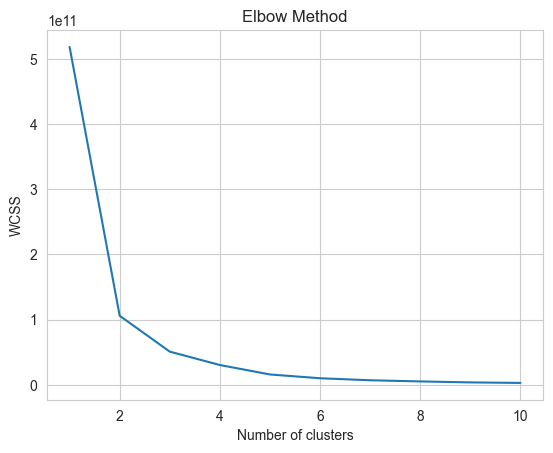

In [147]:
# Importing necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the RFM features for clustering
X = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [149]:
#The Elbow Method graph is used to determine the optimal number of clusters for K-Means clustering. We look for the "elbow" point where the within-cluster sum of squares (WCSS) starts to decrease more slowly, indicating a good balance between the number of clusters and the variance within each cluster.
#Next steps in the analysis would include:
#Determining the optimal number of clusters from the Elbow Method graph.
#Running K-Means clustering with the optimal number of clusters.
#Analyzing the characteristics of each cluster to understand customer profiles.
#Defining strategies for each segment based on their RFM values and cluster characteristics.

In [154]:
# Based on the Elbow Method graph, let's assume the optimal number of clusters is 3
# This is just an assumption for demonstration, in practice, the elbow point should be visually identified
optimal_clusters = 3

# Running K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Adding the cluster labels to the RFM dataframe
rfm_df['Cluster'] = cluster_labels

# Calculating the mean RFM values for each cluster
cluster_profile = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).reset_index()

# Renaming the columns for better readability
cluster_profile.columns = ['Cluster', 'RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']

# Displaying the cluster profiles
cluster_profile

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count
0,0,177.704554,18.128205,2901.258783,2613
1,1,185.351145,292.938931,61826.511832,131
2,2,171.862069,76.661638,15012.762759,464


In [151]:
#The K-Means clustering has been performed with an assumed optimal number of 3 clusters. Here are the profiles for each cluster based on the mean RFM values:

#Cluster 0: This cluster has an average recency of 177.7 days, an average frequency of 18.1, and an average monetary value of $2,901.26. It is the largest cluster with 2,613 customers.
#Cluster 1: This cluster has an average recency of 185.4 days, a high average frequency of 292.9, and a high average monetary value of $61,826.51. It is a smaller cluster with 131 customers.
#Cluster 2: This cluster has an average recency of 171.9 days, an average frequency of 76.7, and an average monetary value of $15,012.76. It contains 464 customers.
#Each cluster represents a different segment of customers, and strategies can be defined accordingly. For example:

#Cluster 0 might represent occasional shoppers.
#Cluster 1 could represent highly engaged and high-spending customers.
#Cluster 2 might represent moderately engaged customers with a higher than average spend.
#Strategies for each segment could involve targeted marketing campaigns, loyalty programs, or personalized incentives to increase engagement and spending.

# 4.Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)¶

In [156]:
#1.First define dependent variable with categories low value, medium value, high value using customer revenue.

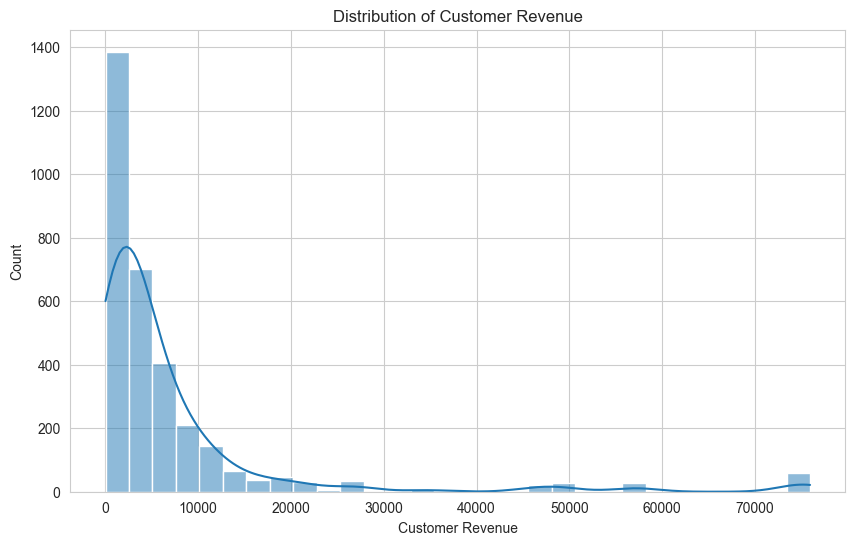

In [157]:
# Defining the dependent variable 'Customer_Value_Category' based on customer revenue
# First, let's take a look at the distribution of customer revenue
import seaborn as sns

# Plotting the distribution of customer revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=rfm_df, x='Monetary', kde=True, bins=30)
plt.title('Distribution of Customer Revenue')
plt.xlabel('Customer Revenue')
plt.ylabel('Count')
plt.show()

In [158]:
# Calculating the quantiles for Monetary value
quantiles = rfm_df['Monetary'].quantile([0.33, 0.66]).to_list()

# Defining the 'Customer_Value_Category' based on the quantiles
rfm_df['Customer_Value_Category'] = 'Low Value'
rfm_df.loc[rfm_df['Monetary'] > quantiles[0], 'Customer_Value_Category'] = 'Medium Value'
rfm_df.loc[rfm_df['Monetary'] > quantiles[1], 'Customer_Value_Category'] = 'High Value'

# Checking the distribution of the new categories
value_counts = rfm_df['Customer_Value_Category'].value_counts().reset_index()
value_counts.columns = ['Customer_Value_Category', 'Count']
print(value_counts)

  Customer_Value_Category  Count
0              High Value   1084
1            Medium Value   1065
2               Low Value   1059


In [159]:
#2.Then perform Classification model

In [160]:
# Splitting the data into features and target variable
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['Customer_Value_Category']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a classification model (e.g., Random Forest, Logistic Regression, etc.)
from sklearn.ensemble import RandomForestClassifier

# Creating and fitting the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluating the model
accuracy = clf.score(X_test, y_test)
print('Accuracy of the classification model:', accuracy)

Accuracy of the classification model: 1.0


In [162]:
X_test.shape

(642, 3)

In [168]:
rfm_df

,CustomerID,Frequency,Monetary,Recency,R,F,M,RFM_Segment,Strategy,Cluster,Customer_Value_Category
0,12346,1,30.99,107,Silver,Standard,Standard,SilverStandardStandard,"Low Value, Low Potential",0,Low Value
1,12347,31,13834.90,282,Premium,Gold,Premium,PremiumGoldPremium,"High Value, High Potential",2,High Value
2,12347,31,13834.90,60,Standard,Gold,Premium,StandardGoldPremium,"Low Value, Low Potential",2,High Value
3,12347,31,13834.90,59,Standard,Gold,Premium,StandardGoldPremium,"Low Value, Low Potential",2,High Value
4,12348,8,1442.12,192,Gold,Standard,Silver,GoldStandardSilver,"Medium Value, Medium Potential",0,Low Value
...,...,...,...,...,...,...,...,...,...,...,...
3203,18269,2,101.56,270,Premium,Standard,Standard,PremiumStandardStandard,"High Value, High Potential",0,Low Value
3204,18269,2,101.56,194,Gold,Standard,Standard,GoldStandardStandard,"Medium Value, Medium Potential",0,Low Value
3205,18277,1,298.00,69,Standard,Standard,Standard,StandardStandardStandard,"Low Value, Low Potential",0,Low Value
3206,18283,53,6362.77,155,Silver,Premium,Gold,SilverPremiumGold,"Low Value, Low Potential",0,High Value


# 6.Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)
1.For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [169]:
# Sort the transactions by date
sales_data.sort_values(by=['CustomerID', 'Transaction_Date'], inplace=True)

# Calculate the difference in days between each purchase for each customer
sales_data['Prev_Purchase_Date'] = sales_data.groupby('CustomerID')['Transaction_Date'].shift(1)
sales_data['Days_Between_Purchases'] = (sales_data['Transaction_Date'] - sales_data['Prev_Purchase_Date']).dt.days

# Display the head of the dataframe to ensure the calculations are correct
sales_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Revenue,Month,Recency,Prev_Purchase_Date,Days_Between_Purchases
38120,12346,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,19.99,September,107,NaT,NaN
38125,12346,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,11.00,September,107,2019-09-15,0.0
10667,12347,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,2.99,March,282,NaT,NaN
10668,12347,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,9.99,March,282,2019-03-24,0.0
10669,12347,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,149.00,March,282,2019-03-24,0.0


In [173]:
# Drop the rows where 'Days_Between_Purchases' is NaN
sales_data = sales_data.dropna(subset=['Days_Between_Purchases'])

# Define the bins for the purchase day categories
bins = [0, 30, 60, 90, np.inf]
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']

# Categorize each purchase
sales_data['Next_Purchase_Day_Range'] = pd.cut(sales_data['Days_Between_Purchases'], bins=bins, labels=labels, right=False)

# Group by CustomerID and get the most recent 'Next_Purchase_Day_Range'
customer_next_purchase_prediction = sales_data.groupby('CustomerID')['Next_Purchase_Day_Range'].agg(lambda x: x.value_counts().index[0])

# Display the prediction for the first few customers
customer_next_purchase_prediction.head()

CustomerID
12346    0-30 days
12347    0-30 days
12348    0-30 days
12350    0-30 days
12356    0-30 days
Name: Next_Purchase_Day_Range, dtype: object

In [174]:
customer_next_purchase_prediction.to_csv('customer_next_purchase_prediction')